In [1]:
# for data handling and plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# upload the file from your computer
print("Uploading car data.csv...")
uploaded = files.upload()

# read the csv into a dataframe
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("File loaded successfully!")

Uploading car data.csv...


Saving car data.csv to car data.csv
File loaded successfully!


In [3]:
# print the first 5 rows
print("Top 5 rows of the dataset:")
print(df.head())

# get info on columns and check for missing values
print("\nData info:")
df.info()

Top 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 no

In [6]:
# The 'Car_Name' column has too many unique names, which is not very useful for a simple model.
# So, we'll drop it for now.
# print("Columns before dropping 'Car_Name':", df.columns) # Adding for debugging
# df = df.drop('Car_Name', axis=1) # Removing this line

# We need to convert text columns ('Fuel_Type', 'Selling_type', 'Transmission') into numbers.
# We'll use a technique called one-hot encoding (pd.get_dummies).
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("\nData after converting text columns:")
print(df.head())


Data after converting text columns:
   Year  Selling_Price  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


In [7]:
# Our target 'y' is the 'Selling_Price' column.
y = df['Selling_Price']

# Our features 'X' are all the other columns.
X = df.drop('Selling_Price', axis=1)

print("\nFeatures and Target have been defined.")


Features and Target have been defined.


In [8]:
# Splitting into 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape to be sure it split correctly
print("\nShapes of our new data sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shapes of our new data sets:
X_train shape: (240, 8)
X_test shape: (61, 8)


In [9]:
# Creating the RandomForestRegressor model
# This model is good for this kind of prediction task
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model with our training data
model.fit(X_train, y_train)

print("\nModel training is complete!")


Model training is complete!



Model R-squared score: 0.96


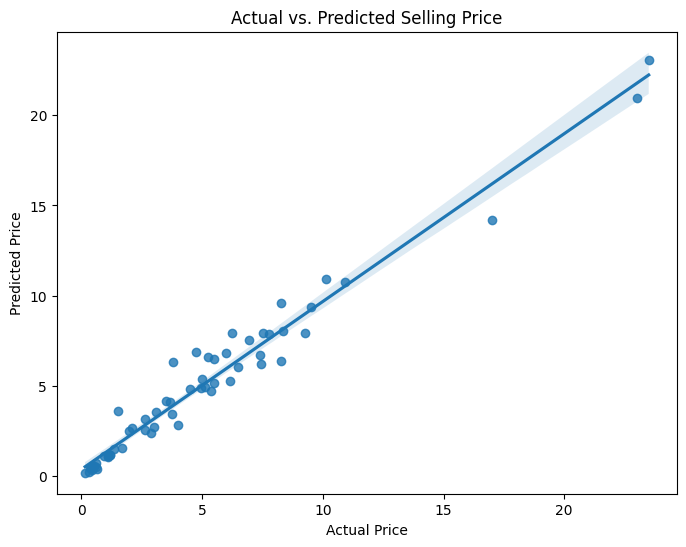

In [10]:
# Making predictions on the test data
predictions = model.predict(X_test)

# Checking the R-squared score. A score closer to 1 is better.
r2_score = metrics.r2_score(y_test, predictions)
print(f"\nModel R-squared score: {r2_score:.2f}")

# We can also look at a plot to see how close our predictions are to the actual prices.
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Selling Price")
plt.show()